# 분산분석
    
## 1. 분산분석의 의미
- OLS 방법이나 확률론적 선형회귀모형을 통해서 가중치값과 예측값을 구하여 원래 정답인 종속값과의 비교를 통해 모형의 성능이 좋은지 안 좋은지 평가할 수 있다. 
- 잔차의 제곱합 RSS를 구하여 잔차의 크기가 작을 수록 예측값이 종속값과 가깝다고 볼 수 있기 때문이다.
- 그런데 독립변수의 스케일이 달라지게되면 잔차제곱합이 달라지므로 잔차 제곱합 만으로는 모형의 성능을 평가할 수 없다. 따라서 이러한 경우 분산분석을 통해 모형의 성능을 평가한다.
- `분산분석 analysis of variance` : 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하는 방법
    - 분산분석을 사용하여 두 개의 선형회귀분석의 성능을 비교할 수 있다. (전체모형과 축소모형)
    - 독립변수의 중요도를 비교할 수 있다. (하나씩 비교하거나 전체를 한번에 비교가능)

## 2. 수학적 의미
- 1) TSS (Total sum of square) : 종속변수값의 움직임의 범위, 분산
    - y의 샘플 평균 : $\bar{y} = \dfrac{1}{N} \sum_{i=1}^{N} y_i$
    - $\text{TSS} = \sum_{i=1}^{N}(y_i - \bar{y})^2=(y-\bar{y}1_N)^T(y-\bar{y}1_N)$
    - y의 샘플 평균을 일벡터와 곱하면 N번 반복하는 브로드캐스팅 벡터가 된다.
    - 행렬로 나타내기 위한 방법

- 2) ESS (explained sum of square) : 예측값의 움직임의 범위, 분산
    - $\text{ESS} = \sum_{i=1}^{N}(\hat{y} - \bar{\hat{y}})^2=(\hat{y}-\bar{\hat{y}}1_N)^T(\hat{y}-\bar{\hat{y}}1_N)$
    
- 3) RSS (residual sum of square) : 잔차의 움직임의 범위, 오차의 크기, 분산
    - $\text{RSS} = \sum_{i=1}^{N}(y - \hat{y})^2=(y-\hat{y}1_N)^T(y-\hat{y}1_N)=e^Te$

### 2-1. TSS = ESS + RSS
- `종속변수의 움직임의 범위 = 예측값의 이동범위 + 잔차의 이동범위`
- 증명 
    - 1) 잔차의 평균은 0이다. 따라서 종속값의 평균과 예측값의 평균은 같다.
        - $e = \bar{y} - \bar{\hat{y}} = 0,\;\; \bar{y} = \bar{\hat{y}}$
        - OLS를 통해서 구한 직교방정식에 따르면 X와 e가 직교한다. X에 상수항 결합을 한 경우 첫번째 열이 1벡터인데 이 1벡터와 잔차벡터의 내적도 직교이므로 0이다. 따라서 잔차의 합은 0이고 이로부터 잔차의 평균도 0이된다는 거을 알 수 있다. 
    
    - 2) 선형 회귀 모형 : $y = X\hat{w} + e = \hat{y} + e$
    - 3) X의 평균 벡터 : $\bar{x} = \dfrac{1}{N}X^T1_N$
        - X의 각 열의 평균값이 원소인 벡터가 된다.
    - 4) 이것에 대한 예측값 : $\bar{x}^T\hat{w} = \bar{y}$
    - 5) 각 행이 평균값으로 반복되는 행렬 : $\bar{X}=\dfrac{1}{N}X^T1_N1_N^T$
        - 각 행에 X의 열의 평균값이 반복된다. 1번 행에는 1번열의 평균값 데이터가 반복
        - 평균 벡터가 열 단위로 합해져 있는 평균 행렬의 형태
    - 6) 이것에 대한 예측값 : $\bar{X}^T\hat{w} = \bar{y}1_N$ 
        - y의 평균값을 원소로 하는 벡터가 된다.
    - 7) X 평균 행렬과 e는 직교 한다.
        - $\bar{X}^Te = \dfrac{1}{N}X^T1_N1_N^Te=\dfrac{1}{N}X^T1_N0=0$
        - 1_N^Te : 잔차의 합이므로 값은 0이다.
    - 8) 직교 방정식 두개를 합한다.
        - $\bar{X}^Te - X^Te = (\bar{X} - X)^Te$

$\begin{aligned}
    TSS
    &= (y - \bar{y}1_N)^T(y - \bar{y}1_N) \\
    &= (\hat{y} - \bar{y}1_N + e)^T(\hat{y} - \bar{y}1_N + e) \\
    &= \vdots \\
    &= (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N)^T + e^Te \\
    &= ESS + RSS \\
    \end{aligned}$

- 이 식의 의미
    - **1) 모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.**
    - **2) 모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.**

## 3. 1차원 데이터로 식 확인

### 3-1. 데이터 생성 함수 임포트

In [1]:
from sklearn.datasets import make_regression

### 3-2. 데이터 프레임 생성

In [3]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30,
                             coef=True, random_state=0)

dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

In [4]:
df.head()

,const,X,Y
0,1.0,-0.359553,-29.387972
1,1.0,0.976639,-18.771359
2,1.0,0.402342,0.563777
3,1.0,-0.813146,19.905024
4,1.0,-0.887786,-31.843421


### 3-3. OLS 모델 생성 및 계산
- 분산분석의 수치들이 result 객체에 내장 되어있다.

In [5]:
model = sm.OLS.from_formula("Y ~ X", df)
result = model.fit()

In [8]:
print("종속변수의 이동범위 TSS = ", result.uncentered_tss)
print("예측값의 이동범위 ESS = ", result.mse_model)
print("잔차의 이동범위 RSS = ", result.ssr)
print("TSS = ESS + RSS = ", result.mse_model + result.ssr)
print("결정계수 R squared = ", result.rsquared)

종속변수의 이동범위 TSS =  291345.7578983061
예측값의 이동범위 ESS =  188589.61349210917
잔차의 이동범위 RSS =  102754.33755137534
TSS = ESS + RSS =  291343.9510434845
결정계수 R squared =  0.6473091780922585


### 3-4. TSS, ESS, RSS의 분산 확인

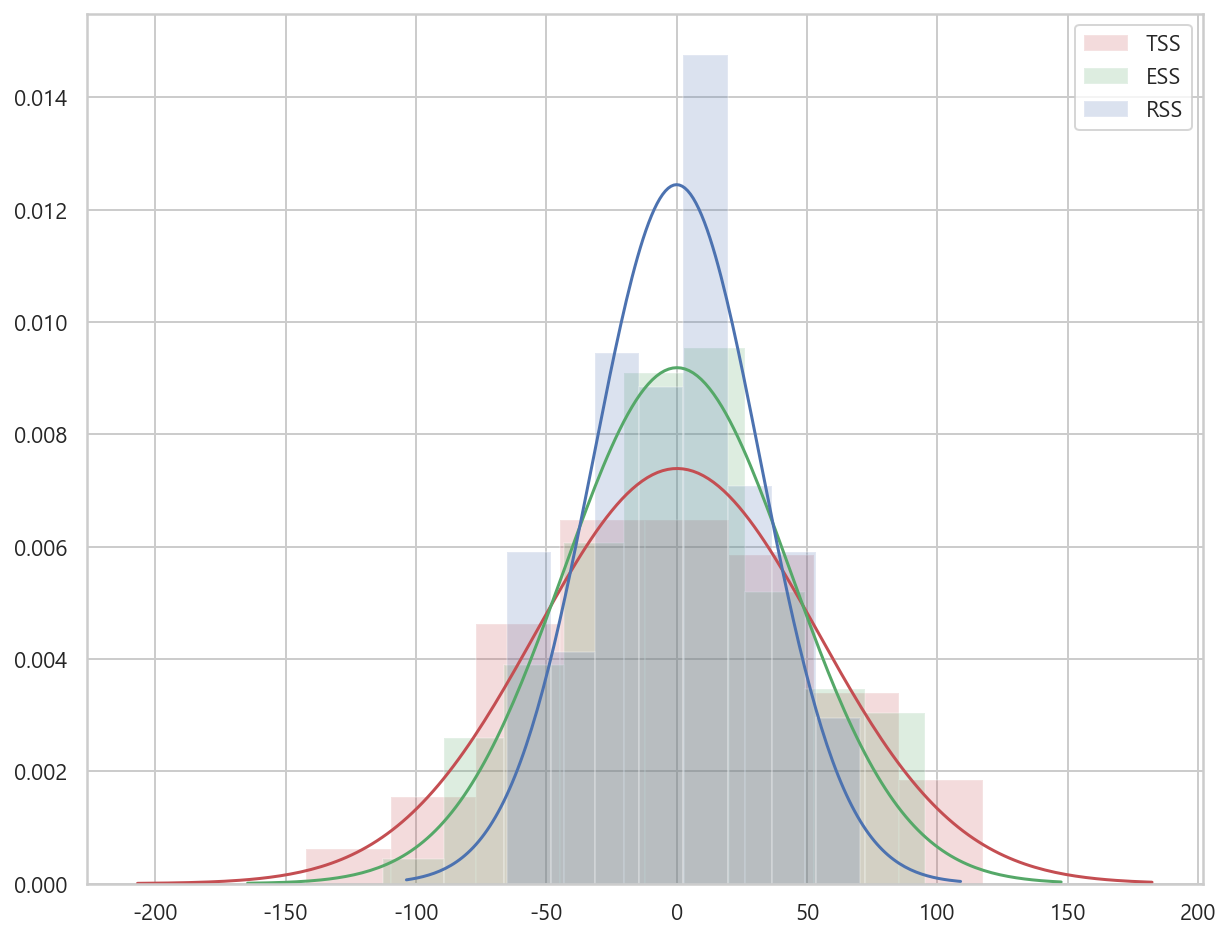

In [12]:
%matplotlib inline

plt.figure(figsize=(10, 8))

sns.distplot(y, kde=False, fit=sp.stats.norm, hist_kws={"color":"r", "alpha":0.2},
            fit_kws={"color":"r"}, label="TSS")

sns.distplot(result.fittedvalues, 
             kde=False, fit=sp.stats.norm, hist_kws={"color":"g", "alpha":0.2},
            fit_kws={"color":"g"}, label="ESS")

sns.distplot(result.resid,
             kde=False, fit=sp.stats.norm, hist_kws={"color":"b", "alpha":0.2},
            fit_kws={"color":"b"}, label="RSS")

plt.legend()
plt.show() ; 

#### 예측값

In [14]:
result.fittedvalues

0    -17.934714
1     39.638175
2     14.893262
3    -37.478808
4    -40.694820
        ...    
95   -52.645684
96   -18.072076
97    12.912314
98   -71.981016
99   -53.312776
Length: 100, dtype: float64

#### 잔차

In [15]:
result.resid

0    -11.453259
1    -58.409534
2    -14.329485
3     57.383832
4      8.851398
        ...    
95     6.090249
96    47.418766
97    -7.768456
98    50.498218
99   -12.863933
Length: 100, dtype: float64

## 4. 결정계수
- `결정계수 coefficient of determination` : 분산분석의 관계를 사용한 모형의 성능 지표
    - $R^2 = 1- \dfrac{RSS}{TSS} = \dfrac{ESS}{TSS}$
- 결정계수의 조건
    - $0 \leq R^2 \leq 1$
- 결정계수의 의미
    - 1) R^2 = 0 : RSS가 최대이고, ESS가 0에 가깝다. 즉 잔차가 크고 예측값이 0이므로 의미없는 모형이라는 뜻이다.
    - 2) R^2 = 1 : RSS가 0이고, ESS가 TSS와 비슷하다. 즉 잔차가 0이고 예측값이 종속값과 거의 같으므로 회귀결과가 완벽하다는 뜻이다. 
    - 따라서 R^2 수치가 1에 가까울 수록 좋은 성능의 모형이라고 할 수 있다.
    
## 5. 분산분석표
- 이미지 첨부

## 6. 회귀분석 F-검정과 분산 분석의 관계
- 회귀분석 F-검정의 귀무가설 : H_0 : R^2 = 0 
    - 모든 계수 w_i가 0이다. 라는 귀무가설이다. 이 가설은 모형 자체가 아무런 의미가 없다는 것을 의미한다. 따라서 결정계수 값도 0이 된다.
- 가중치의 예측값 hat{w}는 기대값이 0인 정규분포에서 나온 표본이다. 따라서 hat{y}도 hat{w}의 선형조합이므로 정규 분포를 따른다. 
- 잔차는 오차의 선형변환으로 정규분포를 따른다. e = M\epsilon
- `회귀분석 F-검정의 검정통계량`
    - $\dfrac{ESS}{K-1} ÷ \dfrac{RSS}{N-K} \sim F(K-1, N-K)$
    - ESS와 RSS의 비율은 F분포를 따른다.

### 6-1. anova_lm
- anova_lm 의 F은 OLS summary의 F-statistic의 값과 같다.
    - 이 값이 작을 수록 0에 가까울 수록 wi=0이라는 귀무가설이 강하게 기각되므로 의미있는 모형이라고 볼 수 있다.
    - 이 값이 클 수록 귀무가설이 강하게 채택되므로 의미가 없는 모형이라고 볼 수 있다.
- anova_lm의 PR(>F)는 OLS summary의 Prob (F-statistics) 값과 같다. 유의확률을 의미한다.     

In [16]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           6.60e-24
Time:                        16:22:36   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

## 7. 결정계수와 상관계수
- y와 hat{y}의 샘플 상관계수 r의 제곱은 R^2 (결정계수)와 같다.

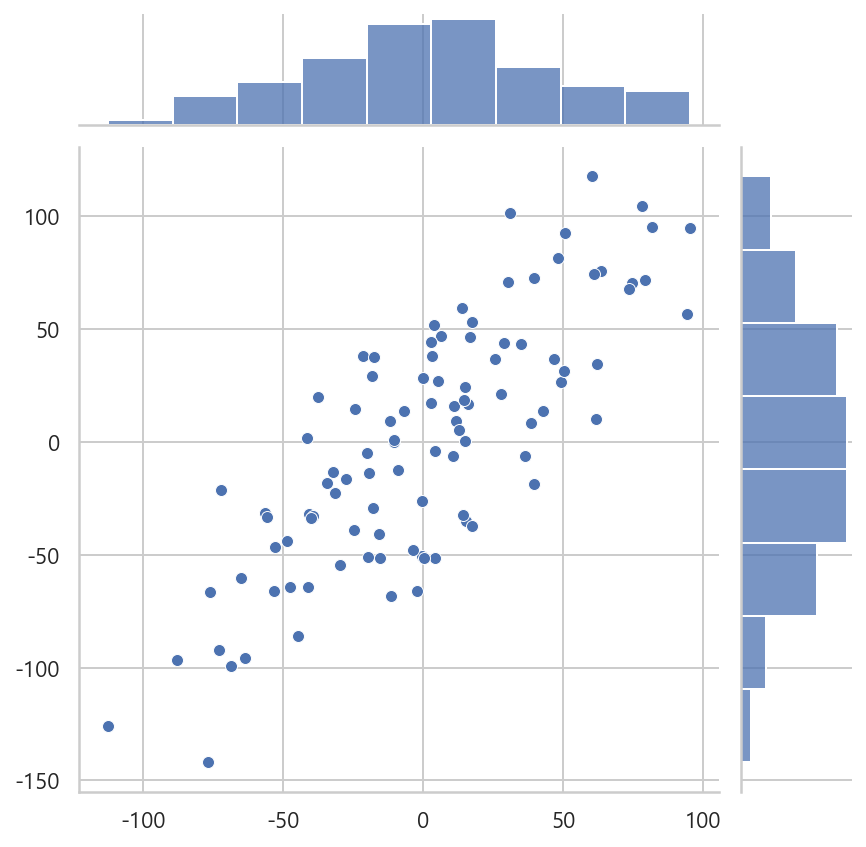

In [18]:
sns.jointplot(result.fittedvalues, y)
plt.show() ; 

## 8. 상수항이 없는 모형
- TSS의 정의가 달라진다.
    - $\text{TSS} = \sum_{i} y_i^2 = y^Ty$
- TSS의 정의를 바꾸지 않으면 TSS=ESS+RSS 관계식이 성립하지 않는다. 따라서 R^2 값이 1보다 커지는 경우가 발생한다. 
- **모형의 결정계수를 비교할 때 상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.**

In [19]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=100,
                             coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

In [20]:
df.head()

,X,Y
0,-0.359553,70.612028
1,0.976639,81.228641
2,0.402342,100.563777
3,-0.813146,119.905024
4,-0.887786,68.156579


### 8-1. 새로운 OLS 모형을 생성하고 계산

In [21]:
model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

### 8-2. 상수항을 뻈는데 결정계수 값이 크게 달라졌다.

In [22]:
result2.rsquared

0.1876872470594393

In [24]:
result.rsquared

0.6473091780922585

## 9. F검정을 이용한 모형의 비교
- F검정을 사용하면 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다.
    - 원래 데이터에서 특정한 독립변수가 빠져있는 데이터
    - 전체 모형 : $y = w_0x_0 + w_1x_1 + w_2x_2$ (모든 독립변수가 있는 모형)
    - 축소 모형 : $y = w_0x_0 + w_1x_1$ (일부 독립변수가 제외 된 모형)
    - 귀무 가설 : $H_0 : w_2 = w_3 = 0$
- 보스턴 집값 데이터에서 AGE, INDUS 변수를 뺀 축소모형과 원래모형이 같은지 비교한다.
    - 유의확률 Pr(>F) 값을 확인한다.

### 9-1. 보스턴 집값 데이터 임포트하고 데이터 프레임으로 변환

In [25]:
from sklearn.datasets import load_boston

In [27]:
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [28]:
df_boston.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 9-2. 특정한 독립변수만 제거하여 OLS 모형으로 계산
- w2=w3=0 이다 라는 귀무가설에 대해서 유의확률이 유의수준보다 크므로 채택된다.
    - 즉 두 AGE, INDUS 독립변수는 종속변수에 큰 영향을 주는 것이 아니므로 축소모형과 전체모형은 거의 유사하다고 볼 수 있다.
    - 가중치가 0이므로 상관관계가 없다. 의미없는 변수이다.

In [50]:
full_col = list(boston.feature_names)
reduce_col = list(set(full_col).difference(["AGE", "INDUS"]))
model_full = sm.OLS.from_formula("MEDV~" + "+".join(full_col), data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV~" + "+".join(reduce_col), data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


In [33]:
"MEDV~" + "+".join(col)

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [41]:
full_col = list(boston.feature_names)
full_col

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [40]:
reduce_col = set(full_col).difference(["AGE", "INDUS"])
reduce_col

{'B',
 'CHAS',
 'CRIM',
 'DIS',
 'LSTAT',
 'NOX',
 'PTRATIO',
 'RAD',
 'RM',
 'TAX',
 'ZN'}

## 10. F검정을 사용한 변수 중요도 비교
- F검정으로 각 독립변수의 중요도를 비교할 수 있다.
- 전체모형과 각 변수를 하나씩 제거한 축소모형을 각각 비교하는 방식이다.
- w1=0 이다 라는 귀무가설에 대해 유의확률이 0.001087은 0에 가까운 값이므로 기가된다고 볼 수 있다.
- 즉 CRIM 이라는 독립변수는 종속변수와 상관관계가 크다는 것을 의미한다. 

In [49]:
model_full = sm.OLS.from_formula("MEDV~" + "+".join(full_col), data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV~" + "+".join(list(set(full_col).difference(["CRIM"]))), data=df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


In [47]:
list(set(full_col).difference(["CRIM"]))

['CHAS',
 'RAD',
 'B',
 'NOX',
 'AGE',
 'RM',
 'DIS',
 'INDUS',
 'ZN',
 'TAX',
 'PTRATIO',
 'LSTAT']

## 11. anova_lm에서 모든 독립변수의 중요도 계산
- 귀무가설은 H_0 : w_i = 0
    - w_1이 0이다 -> 변수 x1은 종속변수에 아무런 영향이 없다.
    - 유의확률이 0이면 귀무가설 기각
    - 유의확률이 유의수준보다 크면 귀무가설 채택
- anova_lm()의 인수 typ의 값으로 2를 설정하면 모든 독립변수에 대한 중요도를 계산 할 수 있다.
- 단일계수 t 검정의 유의확률과 동일하다. 
    - t분포와 F분포의 동치 성질 때문이다.
    - $t_n^2 = F_{(1, n)}$

In [51]:
model_boston = sm.OLS.from_formula("MEDV~" + "+".join(full_col), data=df_boston)
result_boston = model_boston.fit()

sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
CHAS,218.970357,1.0,9.724299,1.925030e-03
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03


## 12. 조정결정계수
- 선형회귀에서 독립변수가 새로 추가되면 계수의 값은 항상 증가한다.
    - "부분회귀"에서 독립변수가 추가될 경우 w값이 커지는 것을 확인 할 수 있었다.
- 종속 변수 y, 기존 독립변수 X, 새로 추가된 독립변수 z 일때 결정계수
    - $R_{Xz}^2 = R_{X}^2 + (1 - R_{X}^2) r_{yz}^2$
    - R_{X}^2 : 기존의 독립변수 X를 사용한 경우의 결정계수
    - R_{Xz}^2 : 기존 독립변수 X와 새로운 독립변수 z를 모두 사용한 경우의 결정계수
    - r_{yz}^2 : 추가된 독립변수 z와 종속 변수 y간의 상관 관계 계수
- 이 항목들이 모두 양수이므로 : $R_{Xz}^2 \geq R_{X}^2$ 
    - 즉 새로운 독립변수 z가 추가된 경우의 결정계수 값이 더 크거나 같다.
- `조정결정계수` : 기존 독립변수 X에 새로운 독립변수 z가 더해졌을 때 결정계수가 더 커질때 이 값을 조정하는 값
    - 독립변수가 추가 된다고 해서 분석의 성능이 크게 변하면 안된다.
    - 독립변수 추가 효과를 상쇄시키기 위한 여러가지 기준들 중에 독립변수의 갯수 K에 따라서 결정 계수의 값을 조정하는 방식
    - $R_{adj}^2 = 1 - \dfrac{n - 1}{n - K}(1 - R^2) = \dfrac{(n-1)R^2 + 1 - K}{n-K}$
- **OLS summary에서 결정계수 아래에 조정결정계수값이 있다.**

## 13. 정보량 규준
- `정보량 규준 informatiion criterion` : 최대 우도에 독립변수의 갯수에 대한 손실(penalty)분을 반영하는 방법
    - 조정결정계수와 함께 모형의 비교 기준으로 많이 사용된다.
- 손실 가중치의 계산 법에 따라서 두 가지 방법으로 구분된다.
- **값이 작을 수록 올바른 모형에 가깝다.**
    - AIC Akike information criterion : 모형과 확률분포 사이의 쿨벡-라이블러 수준을 가장 크게하기 위한 시도에서 나온 방법
        - $AIC = -2logL + 2K$
    - BIC Bayesian information criterion : 데이터가 exponential family라는 가정하에서 주어진 데이터의 모형의 likelihood를 추정하기 위한 값에서 나온 방법
        - $BIC = -2logL + Klogn$